<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#import-packages" data-toc-modified-id="import-packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>import packages</a></span></li><li><span><a href="#check-teacher-data" data-toc-modified-id="check-teacher-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>check teacher data</a></span></li><li><span><a href="#load-data-for-IRC" data-toc-modified-id="load-data-for-IRC-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>load data for IRC</a></span></li><li><span><a href="#compare-policies-of-NN-and-POMDP" data-toc-modified-id="compare-policies-of-NN-and-POMDP-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>compare policies of NN and POMDP</a></span></li><li><span><a href="#IRC" data-toc-modified-id="IRC-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>IRC</a></span><ul class="toc-item"><li><span><a href="#IRC-with-line-search-based-method" data-toc-modified-id="IRC-with-line-search-based-method-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>IRC with line-search based method</a></span></li><li><span><a href="#IRC-with-gradient-descent" data-toc-modified-id="IRC-with-gradient-descent-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>IRC with gradient descent</a></span></li></ul></li><li><span><a href="#Check-points" data-toc-modified-id="Check-points-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Check points</a></span><ul class="toc-item"><li><span><a href="#Contour" data-toc-modified-id="Contour-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Contour</a></span></li><li><span><a href="#Hessian-of-final-points" data-toc-modified-id="Hessian-of-final-points-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Hessian of final points</a></span><ul class="toc-item"><li><span><a href="#Std,-Covariance,-Correlation" data-toc-modified-id="Std,-Covariance,-Correlation-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Std, Covariance, Correlation</a></span></li></ul></li></ul></li><li><span><a href="#Check-IRC-result" data-toc-modified-id="Check-IRC-result-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Check IRC result</a></span><ul class="toc-item"><li><span><a href="#Average-Posterior" data-toc-modified-id="Average-Posterior-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Average Posterior</a></span></li></ul></li><li><span><a href="#save-simulation-results" data-toc-modified-id="save-simulation-results-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>save simulation results</a></span></li></ul></div>

# import packages

In [1]:
from twoboxCol import *
import pickle
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import random_projection
import matplotlib.gridspec as gridspec

import matplotlib as mpl
import matplotlib.pyplot as plt
import os
path = os.getcwd()


from matplotlib.ticker import FormatStrFormatter

In [10]:
a, b, c = np.meshgrid(np.arange(3), np.arange(3), np.arange(3), indexing='ij')
print(c[0])


[[0 1 2]
 [0 1 2]
 [0 1 2]]


In [18]:
row_inds = np.array([0,1])
col_inds = np.array([1,2])
ris, cis = np.ix_(col_inds,row_inds)
c[0,ris, cis]

array([[0, 1],
       [0, 1]])

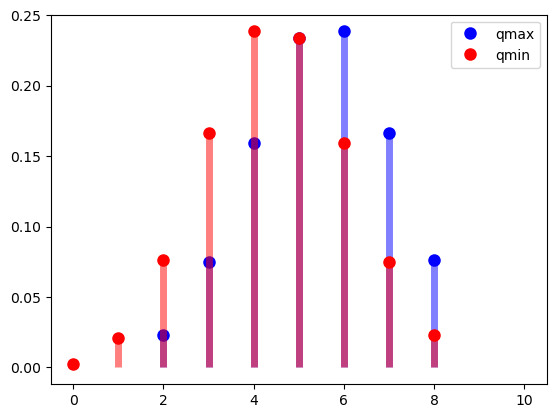

In [2]:
Ncol = 10
qmax = 0.55
qmin = 0.45
p = qmax#qmin
x = np.arange(binom.ppf(0.01, Ncol, p),
              binom.ppf(0.99, Ncol, p))
fig, ax = plt.subplots(1, 1)
ax.plot(x, binom.pmf(x, Ncol, p), 'bo', ms=8, label='qmax')
ax.vlines(x, 0, binom.pmf(x, Ncol, p), colors='b', lw=5, alpha=0.5)
#do the same for qmin
p = qmin
x = np.arange(binom.ppf(0.001, Ncol, p),
              binom.ppf(0.999, Ncol, p))
ax.plot(x, binom.pmf(x, Ncol, p), 'ro', ms=8, label='qmin')
ax.vlines(x, 0, binom.pmf(x, Ncol, p), colors='r', lw=5, alpha=0.5)
ax.set_xlim([-0.5,10.5])
ax.legend()

plt.show()

In [3]:
"""
color code for color cues
"""
rgb = [[255, 0, 0],
       [255/4*3, 0, 255/4*1],
       [255/4*2, 0, 255/4*2],
       [255/4*1, 0, 255/4*3],
       [0, 0, 255]
      ] 
rgb=np.array(rgb)/255.

cmap_col5 = mpl.colors.ListedColormap(rgb,"")

In [4]:
# date of the files
datestring_data = '01262020(150900)'  #POMDP teacher data
datestring_train = '01262020(151953)' #train neural neworks
datestring_NNagent='01262020(170602)' #NN agent behavioral data, closed loop

# check teacher data

In [5]:
dataN_pkl_file1 = open(path + '/Results/'+ datestring_data + '_dataN_twoboxCol.pkl', 'rb')
dataN_pkl1 = pickle.load(dataN_pkl_file1)
dataN_pkl_file1.close()

idx_Sample = 20
act = dataN_pkl1['observations'][idx_Sample, :, 0]
rew = dataN_pkl1['observations'][idx_Sample, :, 1]
loc = dataN_pkl1['observations'][idx_Sample, :, 2]
col1 = dataN_pkl1['observations'][idx_Sample, :, 3]
col2 = dataN_pkl1['observations'][idx_Sample, :, 4]

lat = dataN_pkl1['beliefs'][idx_Sample, :, :]

In [6]:
"""
import parameters of the NN agent in the test case
"""

para_pkl_file = open(path + '/Results/'+ datestring_data+'_para_twoboxCol.pkl', 'rb')
para_pkl = pickle.load(para_pkl_file)
para_pkl_file.close()
nq = para_pkl['nq']  # how many belief states
na = para_pkl['na']  # number of actions
nr = para_pkl['nr']  # number os rewards, 2
nl = para_pkl['nl']  # number of locations, 3
Numcol = para_pkl['ColorNumber'] # number of colors
discount = para_pkl['discount']

# nq, na, nr, nl, Numcol, discount, parametersAgent, parametersExp = para_pkl['NNtest_params']
# Numcol = parametersAgent[7]  # number of colors
Ncol = Numcol - 1  # number value: 0 top Numcol-1


In [7]:
para_pkl

{'discount': 0.99,
 'nq': 10,
 'nr': 2,
 'nl': 3,
 'na': 5,
 'foodDrop': 0,
 'appRate1': 0.17,
 'appRate2': 0.1,
 'disappRate1': 0.1,
 'disappRate2': 0.03,
 'consume': 1,
 'reward': 1,
 'groom': 0.2,
 'travelCost': 0.15,
 'pushButtonCost': 0.3,
 'ColorNumber': 5,
 'qmin': 0.45,
 'qmax': 0.55,
 'appRateExperiment1': 0.17,
 'disappRateExperiment1': 0.1,
 'appRateExperiment2': 0.1,
 'disappRateExperiment2': 0.03,
 'qminExperiment': 0.45,
 'qmaxExperiment': 0.55,
 'temperature': 0.1,
 'sample_length': 1000,
 'sample_number': 100}

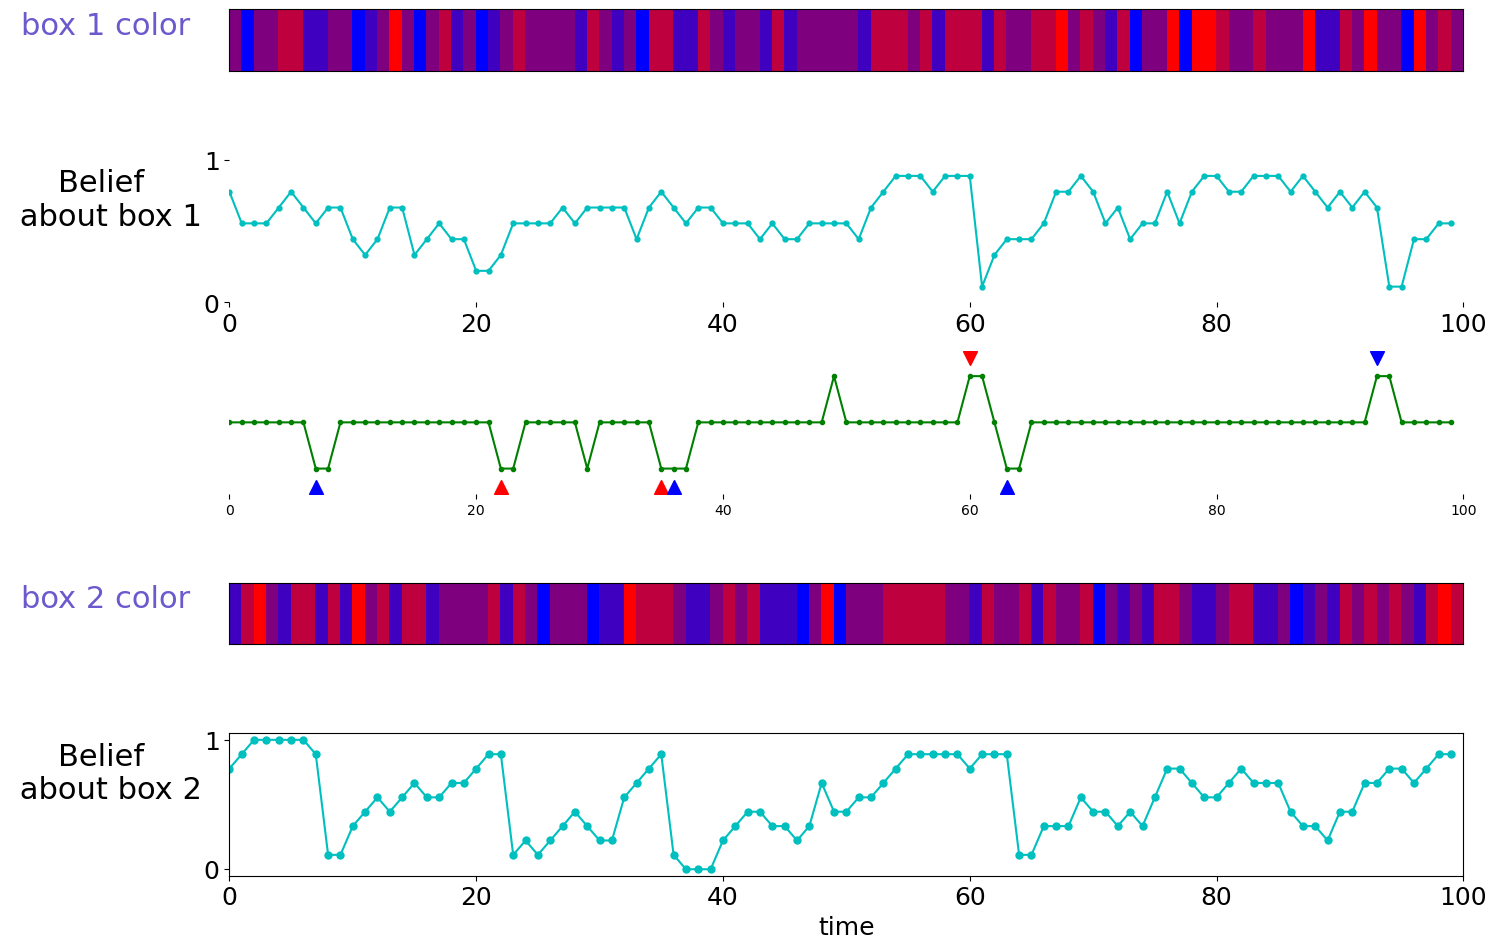

In [9]:
#fig_posterior = plt.figure(figsize= (15, 10))

showlen = 100
startT = 100 

endT = startT + showlen
showT = range(startT,endT)

fig, [ax3, ax1, ax_loc, ax4, ax2] = plt.subplots(5, 1, figsize= (15, 10))

ax3.imshow(np.tile(col1[showT], (5,1)), cmap = cmap_col5,vmin=0, vmax=Ncol)
ax3.yaxis.set_label_coords(-0.1,0)
ax3.set_ylabel('box 1 color', color = 'slateblue', rotation= 360, fontsize = 22)
ax3.set_xticks([])
ax3.set_yticks([])


ax1.plot(lat[showT, 0], color = 'c',marker ='.', markersize = 7)
ax1.yaxis.set_label_coords(-0.1,0.25)
ax1.set_ylabel('Belief \n about box 1', rotation= 360, fontsize = 22)
ax1.set_yticks([0, nq-1])
ax1.set_yticklabels(['0','1'])
ax1.tick_params(axis='both', which='major', labelsize=18)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.set_xlim([0,showlen])

ax_loc.plot((np.remainder(loc[showT]+1, 3) - 1 ) * 10, 'g-o', markersize = 3)
box1_r = act[showT] // 4 * 7 * np.remainder(loc[showT]+1, 3) * np.insert(rew[showT][1:], -1, 0) * 1.0
box2_r = act[showT] // 4 * 7 * (np.remainder(loc[showT]+1, 3) - 2) * np.insert(rew[showT][1:], -1, 0) * 1.0
box1_n = act[showT] // 4 * 7 * np.remainder(loc[showT]+1, 3) * (1-np.insert(rew[showT][1:], -1, 0))* 1.0
box2_n = act[showT] // 4 * 7 * ((np.remainder(loc[showT]+1, 3) - 2) * (1-np.insert(rew[showT][1:], -1, 0)))* 1.0
box1_r[ box1_r==0 ] = np.nan
box2_n[ box2_n==0 ] = np.nan
box2_r[ box2_r==0 ] = np.nan
box1_n[ box1_n==0 ] = np.nan
ax_loc.plot(box2_r, '^', c = 'red', markersize = 10)
ax_loc.plot(box1_n, 'v', c = 'blue', markersize = 10)
ax_loc.plot(box2_n, '^', c = 'blue', markersize = 10)
ax_loc.plot(box1_r, 'v', c = 'red', markersize = 10)

ax_loc.set_xlim([0,showlen])
ax_loc.spines['top'].set_visible(False)
ax_loc.spines['right'].set_visible(False)
ax_loc.spines['bottom'].set_visible(False)
ax_loc.spines['left'].set_visible(False)
ax_loc.set_yticks([])


ax2.plot(lat[showT, 1], color = 'c',marker ='.', markersize = 10)
ax2.set_xlabel('time', fontsize = 18)
ax2.yaxis.set_label_coords(-0.1,0.25)
ax2.set_ylabel('Belief \n about box 2', rotation= 360, fontsize = 22)
ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.set_yticks([0, nq-1])
ax2.set_yticklabels(['0','1'])
ax2.set_xlim([0,showlen])


ax4.imshow(np.tile(col2[showT], (5,1)), cmap = cmap_col5,vmin=0, vmax=Ncol)
ax4.yaxis.set_label_coords(-0.1,0)
ax4.set_ylabel('box 2 color', color = 'slateblue', rotation= 360, fontsize = 22)
ax4.set_xticks([])
ax4.set_yticks([])


plt.tight_layout()
plt.show()


#fig_posterior.savefig('posterior.pdf', format='pdf', bbox_inches = 'tight')

# load data for IRC

In [10]:
dataN_pkl_file1 = open(path + '/Results/'+ datestring_train + '_data' + datestring_data + 
                       '_agentNNdriven' + datestring_NNagent + '_twoboxCol.pkl', 'rb')
dataN_pkl1 = pickle.load(dataN_pkl_file1)
dataN_pkl_file1.close()

idx = 0

obs_IRC = dataN_pkl1['observations'][idx,:5000, :5].astype(int)   #NN agent behavior
lat_IRC = dataN_pkl1['POMDP_agent'][idx, :5000, 1:]  #POMDP agent beliefs, for comparison

obs = dataN_pkl1['observations'][idx,:, :5].astype(int)   #NN agent behavior
lat = dataN_pkl1['POMDP_agent'][idx, :, 1:]  #POMDP agent beliefs, for comparison

act = obs[:, 0]
rew = obs[:, 1]
loc = obs[:, 2]
col1 = obs[:, 3]
col2 = obs[:, 4]

In [21]:
loc

array([1, 0, 0, ..., 0, 2, 2])

In [11]:
dataN_pkl_file = open(path + '/Results/'+ datestring_train +'_data'+ datestring_data+
                      '_agent' + datestring_NNagent + '_mainPara_twoboxCol.pkl', 'rb')
dataN_pkl = pickle.load(dataN_pkl_file)
dataN_pkl_file.close()
nq, na, nr, nl, Numcol, discount, parametersAgent, parametersExp = dataN_pkl['NNtest_params']
Numcol = parametersAgent[7]  # number of colors
Ncol = Numcol - 1  # number value: 0 top Numcol-1


In [12]:
parametersAgent

[0.17, 0.1, 0.1, 0.03, 0.2, 0.15, 0.3, 5, 0.45, 0.55, 0.1]

# compare policies of NN and POMDP

Text(0, 0.5, 'policy $\\pi(a_t|b_t)$')

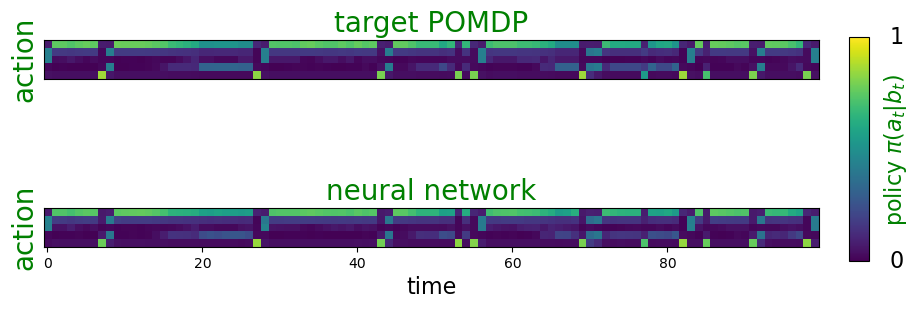

In [13]:
fig_NNtraining, ax = plt.subplots(2,1,figsize=(10,4))

ax[0].imshow(dataN_pkl1['POMDP_agent_dist'][idx,-100:, :na].T, vmin = 0, vmax = 1)
ax[0].set_ylabel('action',  fontsize = 20, color = 'green')
ax[0].set_title ( 'target POMDP', fontsize = 20, color = 'green')
ax[0].set_xticks([])
ax[0].set_yticks([])

im = ax[1].imshow(dataN_pkl1['observations'][idx, -100:, -na:].T, vmin = 0, vmax = 1)
ax[1].set_xlabel('time', fontsize = 16) 
ax[1].set_ylabel('action',  fontsize = 20, color = 'green')
ax[1].set_title ( 'neural network', fontsize = 20, color = 'green')
#ax[1].set_xticks([0, 40])
ax[1].set_yticks([])

cbar_ax = fig_NNtraining.add_axes([0.93, 0.2, 0.02, 0.56])
cb = plt.colorbar(im, cax=cbar_ax)
for j, lab in enumerate(['0','1']):
    cb.ax.text(2.4, j , lab, ha='center', va='center', fontsize = 16)
cb.ax.get_yaxis().set_ticks([])
cb.ax.get_yaxis().labelpad = 10
cb.ax.set_ylabel('policy $\pi(a_t|b_t)$', rotation=90, fontsize = 16, color = 'green')


#plt.outline.set_visible(False)

#fig_NNtraining.savefig('NNtraining.pdf', format='pdf', bbox_inches = 'tight')

In [14]:
POMDP_act_flatten = dataN_pkl1['POMDP_agent'][idx:idx+1, :, 0].reshape(-1,1)
NN_act_flatten = dataN_pkl1['observations'][idx:idx+1, :, 0].reshape(-1,1)
L = len(NN_act_flatten)

POMDP_act_hist = np.zeros(5)
NN_act_hist = np.zeros(5)

for i in range(na):
    POMDP_act_hist[i] = len(np.where(POMDP_act_flatten == i)[0])/L
    NN_act_hist[i] = len(np.where(NN_act_flatten == i)[0])/L

(0.0, 1.0)

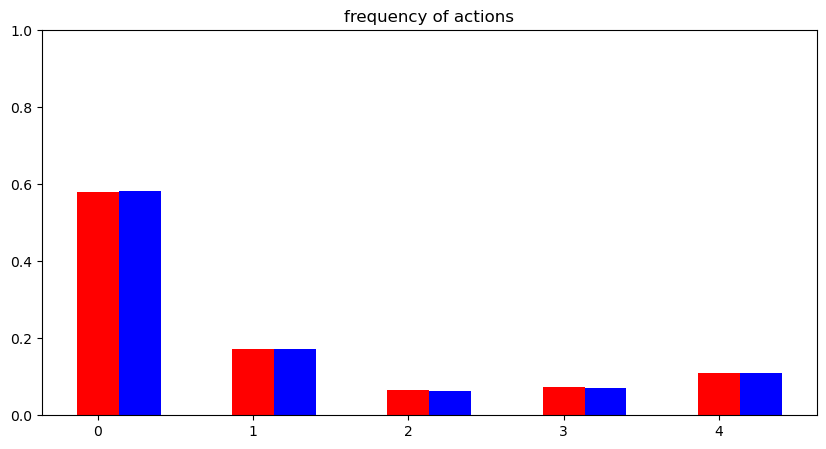

In [15]:
N = 5
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars


fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (10,5))
label = ['POMDP', 'NN']

ax.bar(ind, POMDP_act_hist, width, color='r')
ax.bar(ind+width, NN_act_hist, width, color='b')
ax.set_title('frequency of actions')
ax.set_ylim([0,1])

# IRC

## IRC with line-search based method

In [16]:
"""
check gradient of the true parameter
"""
twoboxd = twoboxColMDP_der(discount, nq, nr, na, nl, parametersAgent)
twoboxd1st = twoboxd.dloglikelihhod_dpara_sim(obs_IRC)
print('\n', twoboxd1st)
print(parametersAgent)



 [ 262.76440349 1137.44110513  165.9406189  -625.78595134 -493.1674639
 -776.68956328 -412.49990227    0.           59.72848066  528.00106096
 3015.06645701]
[0.17, 0.1, 0.1, 0.03, 0.2, 0.15, 0.3, 5, 0.45, 0.55, 0.1]


In [17]:
pointIni = np.array(parametersAgent)
pointIni[0:4] = np.array(parametersExp)[0:4]
pointIni[8:10] = np.array(parametersExp)[4:]
print(pointIni)

[0.2  0.12 0.05 0.07 0.2  0.15 0.3  5.   0.4  0.6  0.1 ]


In [18]:
point = [np.array(pointIni) + (np.random.rand(len(pointIni)) * 2 - 1) * 0.01 , 
         np.array(pointIni) + (np.random.rand(len(pointIni)) * 2 - 1) * 0.01]
point[0][7] = 5
point[1][7] = 5
point

[array([0.20161644, 0.11007966, 0.05852779, 0.0782871 , 0.20504512,
        0.14913455, 0.29453782, 5.        , 0.39470837, 0.60804447,
        0.0977722 ]),
 array([0.19649226, 0.11525519, 0.05154476, 0.07330861, 0.20366238,
        0.15165348, 0.29296373, 5.        , 0.39212528, 0.60827516,
        0.10026133])]

In [19]:
randProjNum = 10
for l in range(randProjNum):
    transformer = random_projection.GaussianRandomProjection(n_components = 2)
    transformer.fit_transform(point)
    projectionMatRand = transformer.components_
    print(projectionMatRand)
    
    # Contour of the likelihood
    step1 = 0.02   # for u (1st principle component)
    step2 = 0.02  # for v (2nd principle component)
    N1 = 8
    N2 = 8
    uOffset = - step1 * N1 / 2 
    vOffset = - step2 * N2 / 2

    uValue = np.zeros(N1)
    vValue = np.zeros(N2)
    Qaux1 = np.zeros((N2, N1))    # Likelihood with ground truth latent
    Qaux2 = np.zeros((N2, N1))    # Expected complete data likelihood
    Qaux3 = np.zeros((N2, N1))    # Entropy of latent posterior
    para_slice = []
    LL_slice = []

    for i in range(N1):
        uValue[i] = step1 * (i) + uOffset
        for j in range(N2):
            vValue[j] = step2 * (j) + vOffset

            para_slicePoints = point[-1] + uValue[i] * projectionMatRand[0] + vValue[j] * projectionMatRand[1]
            para_slicePoints[7] = parametersAgent[7]
            para_slice.append(para_slicePoints)
            para = np.copy(para_slicePoints)       
            #print(para)

            twoboxCol = twoboxColMDP(discount, nq, nr, na, nl, para)
            twoboxCol.setupMDP()
            twoboxCol.solveMDP_sfm()
            ThA = twoboxCol.ThA
            policy = twoboxCol.softpolicy
            pi = np.ones(nq * nq)/ nq /nq  # initialize the estimation of the belief state
            Trans_hybrid_obs12 = twoboxCol.Trans_hybrid_obs12
            Obs_emis_trans1 = twoboxCol.Obs_emis_trans1
            Obs_emis_trans2 = twoboxCol.Obs_emis_trans2
            twoboxColHMM = HMMtwoboxCol(ThA, policy, Trans_hybrid_obs12, Obs_emis_trans1, Obs_emis_trans2, pi, Ncol)

            #Qaux1[j, i] = twoboxHMM.likelihood(lat, obs, ThA, policy)  #given latent state
            Qaux2[j, i] = twoboxColHMM.computeQaux(obs_IRC, ThA, policy, Trans_hybrid_obs12, Obs_emis_trans1, Obs_emis_trans2) 
            Qaux3[j, i] = twoboxColHMM.latent_entr(obs_IRC) 
            
            LL_slice.append(Qaux2[j, i] + Qaux3[j, i])

    Loglikelihood = Qaux2 + Qaux3
    Loglikelihood = np.nan_to_num(Loglikelihood, nan = -100000000000)
    max_point = np.where(Loglikelihood == np.max(Loglikelihood))
    new_point = para_slice[max_point[1][0] * N2 + max_point[0][0]]
    point.append(new_point)
    print(new_point)
    print(Loglikelihood[max_point[0][0], max_point[1][0]])

[[-0.59699817  0.19916473  0.00478601  0.45721848  0.08108905  0.36533599
   1.11359682 -0.0242506   1.05448206 -0.05304316 -0.41789799]
 [-0.81695285  0.70694102  0.76411672  0.7013391   0.31723968  0.12937397
  -0.88200989  0.06185543  0.26599256 -0.46365159  0.20997746]]
[0.16381414 0.14353283 0.08210943 0.10136217 0.21635197 0.15682844
 0.25768333 5.         0.40276498 0.58972909 0.10866042]
-5224.564639024656
[[ 0.3534412  -0.55377371 -0.12896839 -0.5563412   0.56266653 -0.88165749
   0.0749042   0.66009294  0.02085518  1.07201328 -0.03786683]
 [-0.42408062 -0.23940731  0.64947125 -0.30595824 -0.90467594  0.17434332
   1.29591944 -1.0350767  -0.45987211 -1.13596268 -1.27162908]]


KeyboardInterrupt: 

In [19]:
point_all = point
point_all

[array([0.20607935, 0.11446118, 0.04468221, 0.06962941, 0.19649229,
        0.15983267, 0.29715115, 5.        , 0.40875096, 0.60294378,
        0.09095523]),
 array([0.19758934, 0.12189848, 0.05024994, 0.07594882, 0.20981327,
        0.15018192, 0.3078951 , 5.        , 0.40181438, 0.60410095,
        0.10760163]),
 array([0.1927932 , 0.13083006, 0.0939073 , 0.07131173, 0.20428636,
        0.15607219, 0.30803397, 5.        , 0.3947365 , 0.62433813,
        0.10264241])]

## IRC with gradient descent

In [1]:
alpha_rate = 20
learnrate = 10 ** -6

point_add_gra = [point_all[-1]]
max_ll_last = np.max(Loglikelihood)
LL_add_gra = [max_ll_last]

while True:
    alpha = 1
    
    p_last = point_add_gra[-1]#get the last set of parameters
    twoboxd = twoboxColMDP_der(discount, nq, nr, na, nl, p_last)#set up derivative class with the last set of parameters
    twoboxd1st = twoboxd.dloglikelihhod_dpara_sim(obs_IRC)#compute the gradient of the likelihood
    print(p_last)
    print('\n', twoboxd1st)
    
    para_temp = p_last + alpha * learnrate * np.array(twoboxd1st)#update the parameters
    
    #create new MDP with the updated parameters to get the updated MDP params for the next IRC iteration
    twoboxCol_test = twoboxColMDP(discount, nq, nr, na, nl, para_temp)
    twoboxCol_test.setupMDP()
    twoboxCol_test.solveMDP_sfm()
    ThA = twoboxCol_test.ThA
    policy = twoboxCol_test.softpolicy
    pi = np.ones(nq * nq)/ nq /nq  # initialize the estimation of the belief state
    Trans_hybrid_obs12 = twoboxCol_test.Trans_hybrid_obs12
    Obs_emis_trans1 = twoboxCol_test.Obs_emis_trans1
    Obs_emis_trans2 = twoboxCol_test.Obs_emis_trans2
    #Perform Inverse Rational Control to infer the latent states and transitions of the agent 
    twoboxColHMM_test = HMMtwoboxCol(ThA, policy, Trans_hybrid_obs12, Obs_emis_trans1, Obs_emis_trans2, pi, Ncol)
    max_ll_new_temp = twoboxColHMM_test.computeQaux(obs_IRC, ThA, policy, Trans_hybrid_obs12, 
                                               Obs_emis_trans1, Obs_emis_trans2) + twoboxColHMM_test.latent_entr(obs_IRC)
    max_ll_temp = max_ll_new_temp
    print(max_ll_temp)
    
    while max_ll_new_temp < max_ll_last + 0.2 * alpha * learnrate * np.array(twoboxd1st).dot(np.array(twoboxd1st)):
        alpha /= alpha_rate
        para_temp = p_last + alpha * learnrate * np.array(twoboxd1st)
        print(para_temp)

        ## Check the ECDLL (old posterior, new parameters)
        twoboxCol_new = twoboxColMDP(discount, nq, nr, na, nl, para_temp)
        twoboxCol_new.setupMDP()
        twoboxCol_new.solveMDP_sfm()
        ThA_new = twoboxCol_new.ThA
        softpolicy_new = twoboxCol_new.softpolicy
        Trans_hybrid_obs12_new = twoboxCol_new.Trans_hybrid_obs12
        Obs_emis_trans1_new = twoboxCol_new.Obs_emis_trans1
        Obs_emis_trans2_new = twoboxCol_new.Obs_emis_trans2
        
        twoboxColHMM_test = HMMtwoboxCol(ThA, policy, Trans_hybrid_obs12, Obs_emis_trans1, Obs_emis_trans2, pi, Ncol)
        max_ll_new_temp = twoboxColHMM_test.computeQaux(obs_IRC, ThA, policy, Trans_hybrid_obs12, 
                                               Obs_emis_trans1, Obs_emis_trans2) + twoboxColHMM_test.latent_entr(obs_IRC)
        
        print('max_ll_new_temp: ', max_ll_new_temp, '  (alpha = ', alpha, ')')
        if alpha < 10** -6 or max_ll_new_temp < max_ll_temp:
            break
        
        max_ll_temp = max_ll_new_temp
            
    point_add_gra.append(para_temp)
    LL_add_gra.append(max_ll_temp)

    if len(LL_add_gra) >= 2 and np.abs(LL_add_gra[-1] - LL_add_gra[-2]) < 5 * 10** -2:
        print("GD finish")
        break
    


NameError: name 'point_all' is not defined

In [21]:
point_all = point_all + point_add_gra

In [22]:
point_final = point_all[-1]
point_final

array([0.21023327, 0.13528135, 0.09952121, 0.04401071, 0.21816186,
       0.16304653, 0.32053012, 5.        , 0.44215195, 0.5933881 ,
       0.11438321])

# Check points

## Contour

In [23]:
uniques = rmv_dup_arrary(point_all)

In [24]:
pca = PCA(n_components = 2)
pca.fit(uniques - uniques[-1])
projectionMat = pca.components_
projectionMat

array([[-0.28479654, -0.03616195,  0.01501443,  0.30765107, -0.16624557,
        -0.07873555, -0.18756126,  0.        , -0.71605748,  0.47941111,
        -0.10544762],
       [ 0.15208068, -0.24724468, -0.83729448,  0.29624163, -0.13295645,
        -0.07835239, -0.10235004,  0.        , -0.00381576, -0.23848546,
        -0.18904621]])

In [26]:
# Contour of the likelihood
step1 = 0.02   # for u (1st principle component)
step2 = 0.02  # for v (2nd principle component)
N1 = 15
N2 = 15
uOffset = - step1 * N1 / 2
vOffset = - step2 * N2 / 2

uValue = np.zeros(N1)
vValue = np.zeros(N2)
Qaux1 = np.zeros((N2, N1))    # Likelihood with ground truth latent
Qaux2 = np.zeros((N2, N1))    # Expected complete data likelihood
Qaux3 = np.zeros((N2, N1))    # Entropy of latent posterior
para_slice = []

for i in range(N1):
    uValue[i] = step1 * (i) + uOffset
    for j in range(N2):
        vValue[j] = step2 * (j) + vOffset

        para_slicePoints = point_all[-1] + uValue[i] * projectionMat[0] + vValue[j] * projectionMat[1]
        para_slice.append(para_slicePoints)
        para = np.copy(para_slicePoints)
        #print(para)
        
        twoboxCol = twoboxColMDP(discount, nq, nr, na, nl, para)
        twoboxCol.setupMDP()
        if np.any(twoboxCol.ThA<0) == True:
            Qaux2[j, i] = np.nan
            Qaux3[j, i] = np.nan
        else:
            twoboxCol.solveMDP_sfm()
            ThA = twoboxCol.ThA
            policy = twoboxCol.softpolicy
            pi = np.ones(nq * nq)/ nq /nq  # initialize the estimation of the belief state
            Trans_hybrid_obs12 = twoboxCol.Trans_hybrid_obs12
            Obs_emis_trans1 = twoboxCol.Obs_emis_trans1
            Obs_emis_trans2 = twoboxCol.Obs_emis_trans2
            twoboxColHMM = HMMtwoboxCol(ThA, policy, Trans_hybrid_obs12, Obs_emis_trans1, Obs_emis_trans2, pi, Ncol)

            #Qaux1[j, i] = twoboxHMM.likelihood(lat, obs, ThA, policy)  #given latent state
            Qaux2[j, i] = twoboxColHMM.computeQaux(obs_IRC, ThA, policy, Trans_hybrid_obs12, Obs_emis_trans1, Obs_emis_trans2) 
            Qaux3[j, i] = twoboxColHMM.latent_entr(obs_IRC) 

In [27]:
Loglikelihood_original = Qaux2+Qaux3

In [28]:
Loglikelihood = np.nan_to_num(Loglikelihood_original, nan = np.nanmean(Loglikelihood_original))
Loglikelihood

array([[-5554.6061138 , -5543.82151594, -5527.06319728, -5506.75583891,
        -5485.10511412, -5457.43374335, -5423.66505436, -5387.26111913,
        -5356.44479799, -5336.20928668, -5317.85322821, -5306.76942748,
        -5303.58865251, -5308.5940297 , -5315.38111307],
       [-5541.50630707, -5524.92179055, -5503.00253512, -5477.9246969 ,
        -5449.71735812, -5414.99072393, -5374.38329495, -5335.7903743 ,
        -5305.69669282, -5286.04713692, -5270.81507501, -5263.83537719,
        -5262.19015665, -5268.28795316, -5280.96238352],
       [-5531.40180791, -5503.39568364, -5474.82578828, -5444.09136259,
        -5407.80165464, -5366.86898991, -5320.84547316, -5281.33927083,
        -5254.46404398, -5235.45702683, -5223.20325111, -5220.12543083,
        -5222.53716362, -5228.89327731, -5244.31486968],
       [-5515.4230668 , -5476.11985767, -5442.73688066, -5404.30553856,
        -5358.37251461, -5312.75593333, -5264.04611485, -5225.73032846,
        -5202.27817979, -5186.2485453

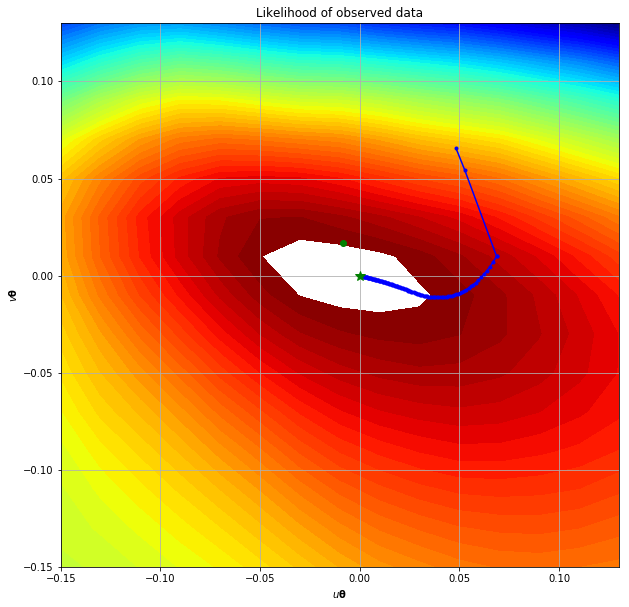

In [29]:
# project the trajectories onto the plane
point_2d = projectionMat.dot((point_all - point_all[-1]).T).T   

# true parameters projected onto the plane
true_2d = projectionMat.dot(parametersAgent - point_all[-1])

fig, ax = plt.subplots(figsize = (10, 10))
uValuemesh, vValuemesh = np.meshgrid(uValue[:], vValue[:])
cs3 = plt.contourf(uValuemesh, vValuemesh, Loglikelihood[:, :], 
                  np.arange(np.min(Loglikelihood[:, :]), np.max(Loglikelihood[:, :]), 20), cmap='jet')
#plt.xticks(np.arange(0, 1, 0.1))
#plt.yticks(np.arange(0, 1, 0.1))
plt.plot(point_2d[:, 0], point_2d[:, 1], marker='.', color = 'b')   # projected trajectories
plt.plot(point_2d[-1, 0], point_2d[-1, 1], marker='*', color = 'g', markersize = 10)        # final point
plt.plot(true_2d[0], true_2d[1], marker='o', color = 'g')           # true


ax.grid()
ax.set_title('Likelihood of observed data')
plt.xlabel(r'$u \mathbf{\theta}$', fontsize = 10)
plt.ylabel(r'$v \mathbf{\theta}$', fontsize = 10)
#plt.clabel(cs3, inline=1, fontsize=10)
#plt.colorbar()
plt.show()


## Hessian of final points

In [30]:
L =len(parametersAgent)
hes_final = np.zeros((L,L))

paraHessian = point_final
#paraHessian = parametersAgent
twoboxd = twoboxColMDP_der(discount, nq, nr, na, nl, paraHessian)
twoboxd1st = twoboxd.dloglikelihhod_dpara_sim(obs_IRC)

perturb = 10** -6
for i in range(L):
    if i != 7:
        para_perb = np.copy(paraHessian)
        para_perb[i] += perturb

        twoboxd_perb = twoboxColMDP_der(discount, nq, nr, na, nl, para_perb)       
        twoboxd1st_pert = twoboxd_perb.dloglikelihhod_dpara_sim(obs_IRC)

        hes_final[i, :] = (twoboxd1st_pert - twoboxd1st) / perturb

In [31]:
# Check eigenvalues of the Hessian
w, v = np.linalg.eig(hes_final)
w, v

(array([-5.07817131e+05, -1.40464925e+05, -1.17227460e+05, -3.43136854e+04,
        -1.83645366e+04, -2.38137960e+02, -1.43144662e+03, -4.91850877e+03,
        -7.51482057e+03, -9.25024302e+03,  0.00000000e+00]),
 array([[-0.06835068,  0.05614177, -0.11024528,  0.05492367,  0.06974349,
         -0.52735272,  0.81474913, -0.16769625, -0.04552426, -0.00547496,
          0.        ],
        [-0.06580259,  0.18747366,  0.26697153,  0.06896951, -0.03622803,
         -0.34094243, -0.17887315,  0.33717735, -0.78727484,  0.03811827,
          0.        ],
        [ 0.29637767, -0.36491994,  0.62442954, -0.11412993, -0.12846543,
          0.10256072,  0.30180107,  0.34812075,  0.14849887,  0.33868849,
          0.        ],
        [ 0.09201297, -0.53031212, -0.65548474,  0.00198159, -0.13942414,
          0.1668255 ,  0.12461281,  0.31773425, -0.30684339,  0.1507726 ,
          0.        ],
        [ 0.32547198, -0.40567953,  0.13868478, -0.11532042,  0.05872056,
         -0.14419815, -0.0398

### Std, Covariance, Correlation

In [32]:
selec_idx = list(range(7)) + list(range(8,11))
var_para_woCol = np.linalg.inv(-hes_final[np.ix_(selec_idx, selec_idx)])
std = np.sqrt(np.diagonal(var_para_woCol))
std

array([0.04047267, 0.02484563, 0.01238955, 0.01303729, 0.01279313,
       0.0070596 , 0.01158708, 0.0363209 , 0.03438527, 0.00392591])

[Text(0,0,'Appearance rate (box 1)'),
 Text(0,0,'Appearance rate (box 2)'),
 Text(0,0,'Disappearance rate (box 1)'),
 Text(0,0,'Disappearance rate (box 2)'),
 Text(0,0,'Grooming reward'),
 Text(0,0,'Traveling cost'),
 Text(0,0,'Pushing button cost'),
 Text(0,0,'Color parameter 1'),
 Text(0,0,'Color parameter 2'),
 Text(0,0,'policy temperature')]

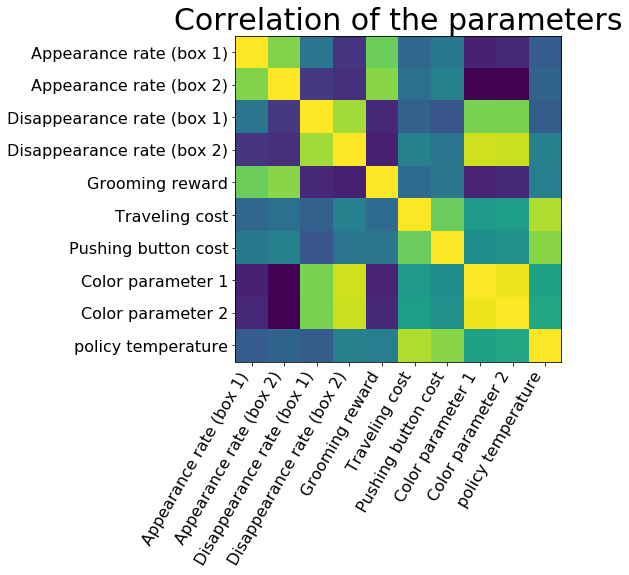

In [33]:
fig_correlation, ax = plt.subplots(figsize = (6, 6))
ax.imshow(np.linalg.inv(np.diag(std)).dot(var_para_woCol).dot(np.linalg.inv(np.diag(std))))
ax.set_title('Correlation of the parameters', fontsize = 30)
ax.set_xticks(list(range(10)))
ax.set_xticklabels( ('Appearance rate (box 1)', 'Appearance rate (box 2)', 'Disappearance rate (box 1)', 
                    'Disappearance rate (box 2)','Grooming reward', 'Traveling cost', 'Pushing button cost',
                    'Color parameter 1','Color parameter 2', 'policy temperature'), rotation = 60, ha = 'right', fontsize = 16)
ax.set_yticks(list(range(10)))
ax.set_yticklabels( ('Appearance rate (box 1)', 'Appearance rate (box 2)', 'Disappearance rate (box 1)', 
                    'Disappearance rate (box 2)','Grooming reward', 'Traveling cost', 'Pushing button cost',
                    'Color parameter 1','Color parameter 2', 'policy temperature'), ha = 'right', fontsize = 16)

[Text(0,0,'Appearance rate (box 1)'),
 Text(0,0,'Appearance rate (box 2)'),
 Text(0,0,'Disappearance rate (box 1)'),
 Text(0,0,'Disappearance rate (box 2)'),
 Text(0,0,'Grooming reward'),
 Text(0,0,'Traveling cost'),
 Text(0,0,'Pushing button cost'),
 Text(0,0,'Color parameter 1'),
 Text(0,0,'Color parameter 2'),
 Text(0,0,'policy temperature')]

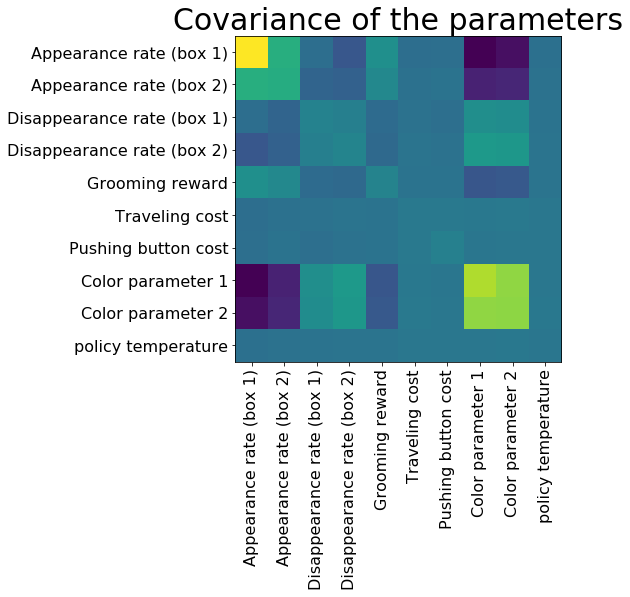

In [34]:
fig_correlation, ax = plt.subplots(figsize = (6, 6))
ax.imshow(var_para_woCol)
ax.set_title('Covariance of the parameters', fontsize = 30)
ax.set_xticks(list(range(10)))
ax.set_xticklabels( ('Appearance rate (box 1)', 'Appearance rate (box 2)', 'Disappearance rate (box 1)', 
                    'Disappearance rate (box 2)','Grooming reward', 'Traveling cost', 'Pushing button cost',
                    'Color parameter 1','Color parameter 2', 'policy temperature'), rotation = 90, ha = 'center', fontsize = 16)
ax.set_yticks(list(range(10)))
ax.set_yticklabels( ('Appearance rate (box 1)', 'Appearance rate (box 2)', 'Disappearance rate (box 1)', 
                    'Disappearance rate (box 2)','Grooming reward', 'Traveling cost', 'Pushing button cost',
                    'Color parameter 1','Color parameter 2', 'policy temperature'), ha = 'right', fontsize = 16)

# Check IRC result 

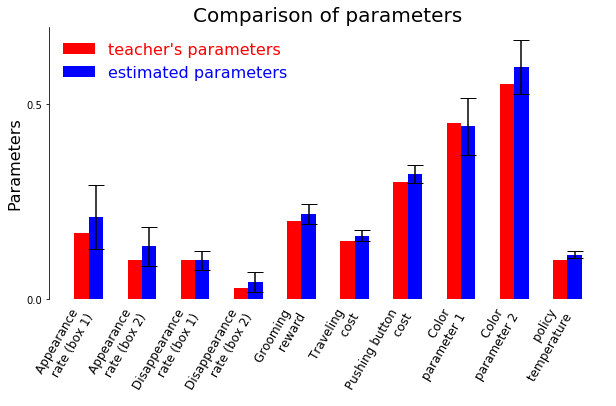

In [35]:
"""
Comparison of parameters
"""

N = 10
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig_parameters = plt.figure(figsize = (10, 5))
ax = fig_parameters.add_subplot(111)

zvals = parametersAgent[:7] + parametersAgent[8:]
yvals = point_final.tolist()[:7] + point_final.tolist()[8:]
rects1 = ax.bar(ind, zvals, width, color='r')
rects2 = ax.bar(ind+width, yvals, yerr=2*std, width = width, color = 'b', 
                align='center', alpha=1, ecolor='black', capsize=8)





ax.set_title('Comparison of parameters', fontsize = 20)
ax.set_ylabel('Parameters', fontsize = 16)
ax.set_yticks([0, 0.5])
ax.set_xticks(ind+width)
ax.set_xticklabels( ('Appearance \n rate (box 1)', 'Appearance \n rate (box 2)', 'Disappearance \n rate (box 1)', 
                    'Disappearance \n rate (box 2)','Grooming \n reward', 'Traveling \n cost', 'Pushing button \n cost',
                    'Color \n parameter 1','Color \n parameter 2', 'policy \n temperature'), rotation=60, ha = 'right', fontsize = 12)
leg = ax.legend( (rects1[0], rects2[0]), ('teacher\'s parameters', 'estimated parameters' ), fontsize = 16 , frameon=False)
leg_c = ['r', 'b']
for i, text in enumerate(leg.get_texts()):
    plt.setp(text, color = leg_c[i])

ax.xaxis.set_tick_params(length = 0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

fig_parameters.savefig('parameters.pdf', format='pdf', bbox_inches = 'tight')

In [36]:
belief_array = (np.arange(nq) + 1/2)/nq
belief_array

array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95])

In [37]:
twoboxCol = twoboxColMDP(discount, nq, nr, na, nl, point_final)
#twoboxCol = twoboxColMDP(discount, nq, nr, na, nl, parametersAgent)
twoboxCol.setupMDP()
twoboxCol.solveMDP_sfm()
ThA = twoboxCol.ThA
policy = twoboxCol.softpolicy
pi = np.ones(nq * nq)/ nq /nq  # initialize the estimation of the belief state
Trans_hybrid_obs12 = twoboxCol.Trans_hybrid_obs12
Obs_emis_trans1 = twoboxCol.Obs_emis_trans1
Obs_emis_trans2 = twoboxCol.Obs_emis_trans2
twoboxColHMM = HMMtwoboxCol(ThA, policy, Trans_hybrid_obs12, Obs_emis_trans1, Obs_emis_trans2, pi, Ncol)

alpha_est, scale_est = twoboxColHMM.forward_scale(obs)
beta_est = twoboxColHMM.backward_scale(obs, scale_est)
gamma_est = twoboxColHMM.compute_gamma(alpha_est, beta_est)
xi_est =  twoboxColHMM.compute_xi(alpha_est, beta_est, obs)

belief1_est = np.sum(np.reshape(gamma_est.T, (gamma_est.T.shape[0], nq, nq)), axis = 2)
belief2_est = np.sum(np.reshape(gamma_est.T, (gamma_est.T.shape[0], nq, nq)), axis = 1)

In [38]:
quan_true_bel1 = (lat[:, 0] + 1/2)/nq
quan_true_bel2 = (lat[:, 1] + 1/2)/nq

In [39]:
belief1_est_MAP = (np.argmax(belief1_est, axis = 1) + 0.5)/nq
belief2_est_MAP = (np.argmax(belief2_est, axis = 1) + 0.5)/nq

belief1_est_EXP = belief1_est.dot(belief_array)
belief2_est_EXP = belief2_est.dot(belief_array)

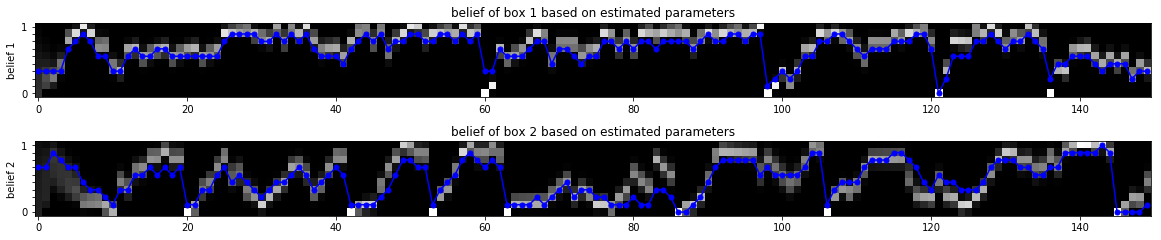

In [40]:
showT_start = 0
showT_end = showT_start+150
#fig = plt.figure(figsize= (20, 4))
fig, ax = plt.subplots(2,1, figsize= (20, 4))
#ax[0] = fig.add_subplot(211)
ax[0].imshow(np.flipud(belief1_est[showT_start:showT_end].T), interpolation='Nearest', cmap='gray')
ax[0].plot(nq - 1 - (quan_true_bel1[showT_start:showT_end] * nq - .5), color = 'b',marker ='.', markersize = 10)
ax[0].set(title = 'belief of box 1 based on estimated parameters', ylabel = 'belief 1')
ax[0].set_yticks([0,1,2,3,4,5,6,7,8,9])
#ax[0].set_ylim(ax[0].get_ylim()[::-1])
labels = [item.get_text() for item in ax[0].get_yticklabels()]
labels[0] = '1'
labels[-1] = '0'
ax[0].set_yticklabels(labels)


ax[1].imshow(np.flipud(belief2_est[showT_start:showT_end].T), interpolation='Nearest', cmap='gray')
pl1 = ax[1].plot(nq - 1 - (quan_true_bel2[showT_start:showT_end] * nq - .5), color = 'b',marker ='.', markersize = 10)
#pl2 = ax[1].plot(nq - 1 - (lat[showT_start:showT_end, 1] * nq - 0.5), color = 'c',marker ='.', markersize = 10)
ax[1].set(title = 'belief of box 2 based on estimated parameters', ylabel = 'belief 2')
#ax[1].set_ylim(ax[1].get_ylim()[::-1])
ax[1].set_yticks([0,1,2,3,4,5,6,7,8,9])
#ax[0].set_ylim(ax[0].get_ylim()[::-1])
labels = [item.get_text() for item in ax[1].get_yticklabels()]
labels[0] = '1'
labels[-1] = '0'
ax[1].set_yticklabels(labels)
plt.show()



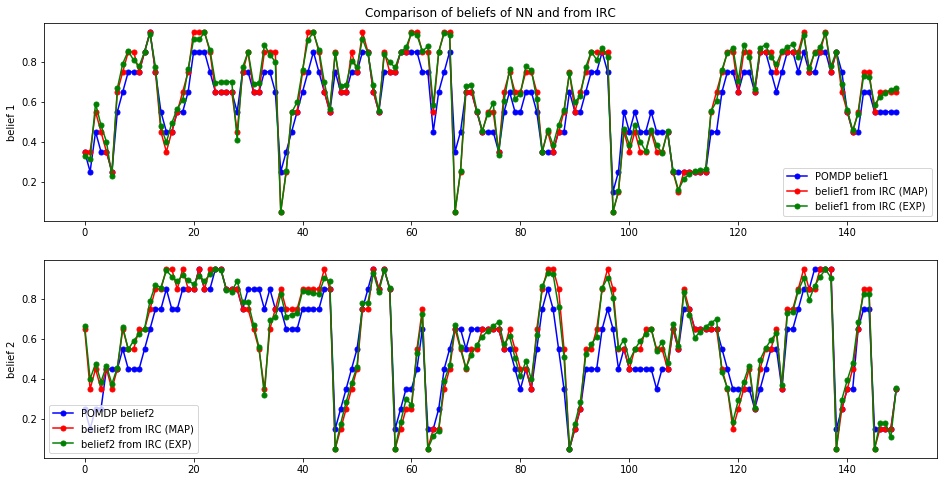

In [42]:
showT_start = 150
showT_end = 300

fig, ax = plt.subplots(2,1, figsize= (16, 8))
ax[0].plot(quan_true_bel1[showT_start:showT_end], color = 'b',marker ='.', 
           markersize = 10, label = 'POMDP belief1')
#ax[0].plot(belief2_est[showT_start:showT_end].dot(belief_array), color = 'r',marker ='.', markersize = 10)
ax[0].plot(belief1_est_MAP[showT_start:showT_end], 
           color = 'r',marker ='.', markersize = 10, label = 'belief1 from IRC (MAP)')
ax[0].plot(belief1_est_EXP[showT_start:showT_end], 
           color = 'g',marker ='.', markersize = 10, label = 'belief1 from IRC (EXP)')
ax[0].set(title = 'Comparison of beliefs of NN and from IRC', ylabel = 'belief 1')
ax[0].legend()


ax[1].plot(quan_true_bel2[showT_start:showT_end], color = 'b',marker ='.', 
           markersize = 10, label = 'POMDP belief2')
ax[1].plot(belief2_est_MAP[showT_start:showT_end], 
           color = 'r',marker ='.', markersize = 10, label = 'belief2 from IRC (MAP)')
ax[1].plot(belief2_est_EXP[showT_start:showT_end], 
           color = 'g',marker ='.', markersize = 10, label = 'belief2 from IRC (EXP)')

ax[1].set(ylabel = 'belief 2')


ax[1].legend()


plt.show()


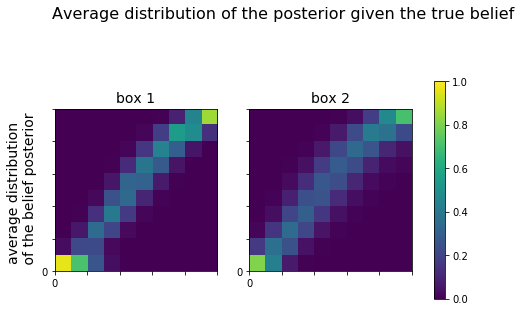

In [43]:
mutual1 = np.zeros((nq, nq))
for i in range(nq):
    index = np.where(lat[:, 0]==i)
    #mutual1[i] = np.sum(belief1_allest.T[:, index[0].tolist()], axis = 1)/np.size(index)
    mutual1[:, i] = np.sum(belief1_est.T[:, index[0].tolist()], axis = 1) /np.size(index)
    mutual1[:, i] = mutual1[:, i] / np.sum(mutual1[:, i] )

mutual2 = np.zeros((nq,nq))
for i in range(nq):
    index = np.where(lat[:, 1]==i)
    mutual2[:, i] = np.sum(belief2_est.T[:, index[0].tolist()], axis = 1) /np.size(index)
    mutual2[:, i] = mutual2[:, i] / np.sum(mutual2[:, i] )
    

fig_beliefdist, ax = plt.subplots(1, 2, figsize=(8,8), sharex=True)
fig_beliefdist.text(0.12, 0.8, 'Average distribution of the posterior given the true belief', fontsize = 16)

ax[0].imshow(mutual1, origin='lower', extent=[0,1,0,1], vmin=0, vmax=1)
ax[0].set_ylabel('average distribution \n of the belief posterior', fontsize = 14)
#ax[0].set_xlabel('true belief', fontsize = 12)
for index, label in enumerate(ax[0].xaxis.get_ticklabels()):
    if index != 0 and index != nq:
        label.set_visible(False)
for index, label in enumerate(ax[0].yaxis.get_ticklabels()):
    if index != 0 and index != nq:
        label.set_visible(False)
ax[0].xaxis.set_major_formatter(FormatStrFormatter('%.0f'))        
ax[0].yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax[0].set_title('box 1', fontsize = 14)


im = ax[1].imshow(mutual2, origin='lower', extent=[0,1,0,1], vmin=0, vmax=1)
#ax[1].set_ylabel('average distribution \n of the belief posterior', fontsize = 12)
#ax[1].set_xlabel('true belief', fontsize = 12)
for index, label in enumerate(ax[1].xaxis.get_ticklabels()):
    if index != 0 and index != nq:
        label.set_visible(False)
for index, label in enumerate(ax[1].yaxis.get_ticklabels()):
    if index != 0 and index != nq:
        label.set_visible(False)
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%.0f'))        
ax[1].yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax[1].set_title('box 2', fontsize = 14)

fig_beliefdist.colorbar(im, ax=ax.ravel().tolist(), shrink=0.5)
# fig_beliefdist.subplots_adjust(right=0.8)
# cbar_ax = fig.add_axes([0.85, 0.3, 0.03, 0.4])
# fig_beliefdist.colorbar(im, cax=cbar_ax)
# fig_beliefdist.text(0.4, 0.2, 'true belief', fontsize = 14)
#plt.tight_layout()




## Average Posterior

In [ ]:
selec_idx = list(range(7)) + list(range(8,11))
N_para_test = 10

mean_para = point_all[-1]
mean_para_woCol = np.concatenate((mean_para[0:7], mean_para[8:]))
var_para_woCol = np.linalg.inv(-hes_final[np.ix_(selec_idx, selec_idx)])
para_sample_woCol = np.random.multivariate_normal(mean_para_woCol, var_para_woCol, N_para_test)

para_sample = []
for i, para_temp_woCol in enumerate(para_sample_woCol):
    para_temp = np.insert(para_temp_woCol, 7, 5)
    para_sample.append(para_temp)

In [ ]:
belief1_test= np.zeros((N_para_test, 20000, nq))
belief2_test= np.zeros((N_para_test, 20000, nq))


for i, para_test in enumerate(para_sample):
    twoboxCol_test = twoboxColMDP(discount, nq, nr, na, nl, para_test)
    twoboxCol_test.setupMDP()
    twoboxCol_test.solveMDP_sfm()
    ThA = twoboxCol_test.ThA
    policy = twoboxCol_test.softpolicy
    pi = np.ones(nq * nq)/ nq /nq  # initialize the estimation of the belief state
    Trans_hybrid_obs12 = twoboxCol_test.Trans_hybrid_obs12
    Obs_emis_trans1 = twoboxCol_test.Obs_emis_trans1
    Obs_emis_trans2 = twoboxCol_test.Obs_emis_trans2
    twoboxColHMM_test = HMMtwoboxCol(ThA, policy, Trans_hybrid_obs12, Obs_emis_trans1, Obs_emis_trans2, pi, Ncol)

    alpha_test, scale_test = twoboxColHMM_test.forward_scale(obs)
    beta_test = twoboxColHMM_test.backward_scale(obs, scale_test)
    gamma_test = twoboxColHMM_test.compute_gamma(alpha_test, beta_test)
    xi_test = twoboxColHMM_test.compute_xi(alpha_test, beta_test, obs)

    belief1_test[i] = np.sum(np.reshape(gamma_test[:, :].T, (-1, nq, nq)), axis = 2)
    belief2_test[i] = np.sum(np.reshape(gamma_test[:, :].T, (-1, nq, nq)), axis = 1)


In [ ]:
fig, ax = plt.subplots(1,1, figsize= (16, 8))
plt.imshow(np.flipud(np.mean(belief1_test, axis = 0).T[:, :100]), vmin = 0, vmax = 1)
plt.plot(nq - 1 - (quan_true_bel1[:100] * nq - .5), color = 'b',marker ='.', markersize = 1)

In [ ]:
para_sample = []
for i in range(N_para_test):
    para_temp = mean_para + (np.random.rand(len(mean_para)) * 2 - 1) * 0.05
    para_temp[7] = Numcol
    para_sample.append(para_temp)

belief1_test1= np.zeros((N_para_test, 20000, nq))
belief2_test1= np.zeros((N_para_test, 20000, nq))


for i, para_test in enumerate(para_sample):
    twoboxCol_test = twoboxColMDP(discount, nq, nr, na, nl, para_test)
    twoboxCol_test.setupMDP()
    twoboxCol_test.solveMDP_sfm()
    ThA = twoboxCol_test.ThA
    policy = twoboxCol_test.softpolicy
    pi = np.ones(nq * nq)/ nq /nq  # initialize the estimation of the belief state
    Trans_hybrid_obs12 = twoboxCol_test.Trans_hybrid_obs12
    Obs_emis_trans1 = twoboxCol_test.Obs_emis_trans1
    Obs_emis_trans2 = twoboxCol_test.Obs_emis_trans2
    twoboxColHMM_test = HMMtwoboxCol(ThA, policy, Trans_hybrid_obs12, Obs_emis_trans1, Obs_emis_trans2, pi, Ncol)

    alpha_test, scale_test = twoboxColHMM_test.forward_scale(obs)
    beta_test = twoboxColHMM_test.backward_scale(obs, scale_test)
    gamma_test = twoboxColHMM_test.compute_gamma(alpha_test, beta_test)
    xi_test = twoboxColHMM_test.compute_xi(alpha_test, beta_test, obs)

    belief1_test1[i] = np.sum(np.reshape(gamma_test[:, :].T, (-1, nq, nq)), axis = 2)
    belief2_test1[i] = np.sum(np.reshape(gamma_test[:, :].T, (-1, nq, nq)), axis = 1)



In [ ]:
fig, ax = plt.subplots(1,1, figsize= (16, 8))
plt.imshow(np.flipud(np.mean(belief1_test1, axis = 0).T[:, :100]), vmin = 0, vmax = 1)
plt.plot(nq - 1 - (quan_true_bel1[:100] * nq - .5), color = 'b',marker ='.', markersize = 1)

In [ ]:
fig, ax = plt.subplots(1,1, figsize= (16, 8))
plt.imshow(np.flipud(belief1_est.T[:, :100]), vmin = 0, vmax = 1)
plt.plot(nq - 1 - (quan_true_bel1[:100] * nq - .5), color = 'b',marker ='.', markersize = 1)

# save simulation results

In [44]:
%who


FormatStrFormatter	 HMMtwoboxCol	 L	 LL_add_gra	 LL_slice	 Loglikelihood	 Loglikelihood_original	 MDP	 N	 
N1	 N2	 NN_act_flatten	 NN_act_hist	 Ncol	 Numcol	 Obs_emis_trans1	 Obs_emis_trans2	 PCA	 
POMDP_act_flatten	 POMDP_act_hist	 Qaux1	 Qaux2	 Qaux3	 QfromV	 QfromV_pi	 ThA	 Trans_hybrid_obs12	 
ValueIteration_opZW	 ValueIteration_sfmZW	 a0	 act	 alpha	 alpha_est	 alpha_rate	 ax	 belief1_est	 
belief1_est_EXP	 belief1_est_MAP	 belief2_est	 belief2_est_EXP	 belief2_est_MAP	 beliefTransitionMatrix	 beliefTransitionMatrixGaussian	 beliefTransitionMatrixGaussianCol	 beliefTransitionMatrixGaussianDerivative	 
belief_array	 beta_est	 binom	 block_diag	 cb	 cbar_ax	 cmap_col5	 col1	 col2	 
col2im	 cs3	 dataN_pkl	 dataN_pkl1	 dataN_pkl_file	 dataN_pkl_file1	 datestring_NNagent	 datestring_data	 datestring_train	 
datetime	 discount	 division	 expm	 fig	 fig_NNtraining	 fig_beliefdist	 fig_correlation	 fig_parameters	 
find_closest	 find_closest_array	 g0	 g1	 g2	 gamma_est	 gridspec	 hes_fin

In [ ]:
datestring_IRC = datetime.strftime(datetime.now(), '%m%d%Y')  # current time used to set file name
datestring_IRC

In [45]:
path + '/Results/' + datestring_train + '_data' + datestring_data +  '_agentNN' + datestring_NNagent + '_IRC'+ str(idx) +'_twoboxCol'

'/Users/zhengwei/Dropbox (Personal)/BCM/_Code/pomdpwithnn/Results/01262020(151953)_data01262020(150900)_agentNN01262020(170602)_IRC2_twoboxCol'

In [46]:
IRC_dict = {'Loglikelihood': Loglikelihood,
            'Qaux1': Qaux1,
            'Qaux2': Qaux2,
            'Qaux3': Qaux3,
            'Loglikelihood': Loglikelihood,
            'Loglikelihood_original': Loglikelihood_original,
            'uValue': uValue,
            'uValuemesh': uValuemesh,
            'vValue': vValue,
            'vValuemesh': vValuemesh,
            'point': point,
            'point_add_gra': point_add_gra,
            'LL_add_gra': LL_add_gra,
            'point_all': point_all,
            'point_final' : point_final,
            'uniques': uniques,
            'projectionMat': projectionMat,
            'belief1_est': belief1_est,
            'belief2_est': belief2_est,
            'belief1_est_MAP': belief1_est_MAP,
            'belief2_est_MAP': belief2_est_MAP,
            'belief1_est_EXP': belief1_est_EXP,
            'belief2_est_EXP': belief2_est_EXP,
            'quan_true_bel1_POMDP': quan_true_bel1,
            'quan_true_bel2_POMDP': quan_true_bel2,
            'hes_final': hes_final,
            'var_para_woCol': var_para_woCol,
            'std_para_woCol': std,
            'LL_add_gra': LL_add_gra
            }

para_output = open(path + '/Results/' + datestring_train + '_data' + datestring_data +  
                   '_agentNN' + datestring_NNagent + '_' + datestring_IRC+ 'IRC'+ str(idx) +'_twoboxCol' + '.pkl', 'wb')
pickle.dump(IRC_dict, para_output)
para_output.close()